# P2 - Exploring Titanic Data

In the following paragraphs, I explore the [Titanic-Dataset](https://www.kaggle.com/c/titanic/data) to explore possible factors that explain survival patterns of the 1912 sinking of the RMS Titanic.

First, here's a first look at the data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

titanic_df = pd.read_csv('titanic_data.csv')

In [6]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploring the data

First, here's an exploratory look on the data. This helps with getting a general feeling for the data.

The data-set has data for 891 Titanic passengers. Most notably, the data-set includes information on the survival of those passengers and on their social status and family structure.  

First, here's a look at the variables' data-types.

In [7]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Next, here's a table that shows a descriptive overview of the variables in the dataset. 

In [8]:
# a quick describe function, becaues `.describe` does not include the counts for non-numneric variables
def my_description_table(table):
    descr_table = pd.DataFrame()
    descr_table['count'] = table.count()
    
    descr_table['mean'] = table.mean()
    descr_table['std'] = table.std()

    return descr_table
    
my_description_table(titanic_df)

,count,mean,std
PassengerId,891,446.000000,257.353842
Survived,891,0.383838,0.486592
Pclass,891,2.308642,0.836071
Name,891,NaN,NaN
Sex,891,NaN,NaN
Age,714,29.699118,14.526497
SibSp,891,0.523008,1.102743
Parch,891,0.381594,0.806057
Ticket,891,NaN,NaN
Fare,891,32.204208,49.693429


## Cleaning the Data

After exploring the data, there are the following problems that need to be fixed before the analysis can proceed.

-  I convert the `Survived`, `Pclass`, `Sex`, and `Embarked` variables to categorical `dtypes` for accurate representation and plotting.

In [9]:
titanic_df['Survived'] = titanic_df['Survived'].astype('category')

In [10]:
titanic_df['Sex'] = titanic_df['Sex'].astype('category')

In [11]:
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')

In [12]:
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')

## Errors in the data / missing values
It is first notable that for the `Age` and `Cabin` variables, there are many missing values. Therefore, I will not focus on an analysis based on the cabin that a passenger occupied. For the `age` variable, data is not available for a large number of individuals. So, conclusions drawn from the age variable should be considered carefully as I do not know the cause of the missing values.

## First visualization

Next, I need a series of plots that describe the variables and give a first look at possible relations to the chances of survival. For the plots, I only use a selection of variables that I think to be possibly causally influential. 

For each variable, I present two plots. The first represents the total count data. The second shows percentages for the relevant groups.

In [13]:
# define function to calculate group pecentages
def group_percentages(gr1, gr2):
    titanic_sub_total = titanic_df.groupby([gr1, gr2], as_index = False).size().reset_index() # get grouped counts
    titanic_sub_total.columns = [gr1, gr2, 'counts']
    titanic_sub_sums = titanic_df.groupby(gr1).size() # get counts of first group to calculate percentages
    division_list = [] # empty list to hold list of divisors, i.e. right number of titanic_sub_sums
    items = np.sort(list(titanic_df[gr1].unique())) # get items of grouping variable, needs to be transformed to a list and sorted
    length_first_group = []
    
    for item in items: # loop through each item of the first group to get count of grouped rows for each gr1 value
        length_first_group.append(len(titanic_sub_total[titanic_sub_total[gr1] == item]))
    
    for i in range(len(items)): #create division list
        j = 1
        while j <= length_first_group[i]: #loop through first group length to repeat entries in division list
            division_list.append(titanic_sub_sums.values[i])
            j = j + 1  
    titanic_sub_total['shares'] = titanic_sub_total['counts'] / division_list # finally, do the calculation of the percentages
    return titanic_sub_total

### Passenger Class

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


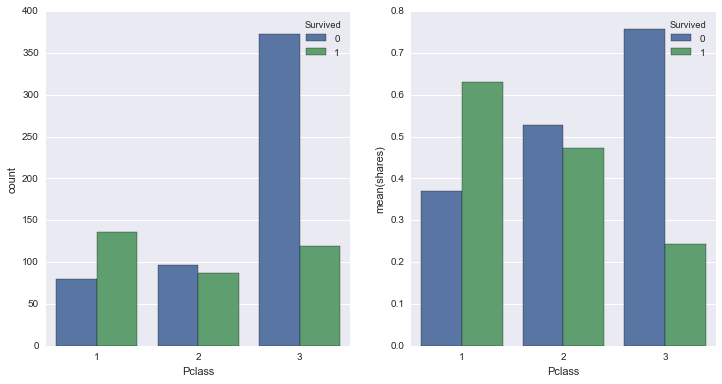

In [14]:
#import matplotlib.gridspec as gridspec
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

fig = plt.figure()
ax1 = fig.add_subplot(121)

sns.countplot(x = 'Pclass', hue = "Survived", data = titanic_df)

ax2 = fig.add_subplot(122)

titanic_sub_rel = group_percentages('Pclass', 'Survived')
sns.barplot(x = 'Pclass', y = 'shares', hue = 'Survived', data = titanic_sub_rel)

plt.show()


*Discussion:* Comparing the survival of passengers of different classes, we see that, in relative terms, more 1st class passengers survived (63 percent) than 2nd (47 percent) or 3d class passengers (24 percent). I will further analyze this finding, below.

### Gender

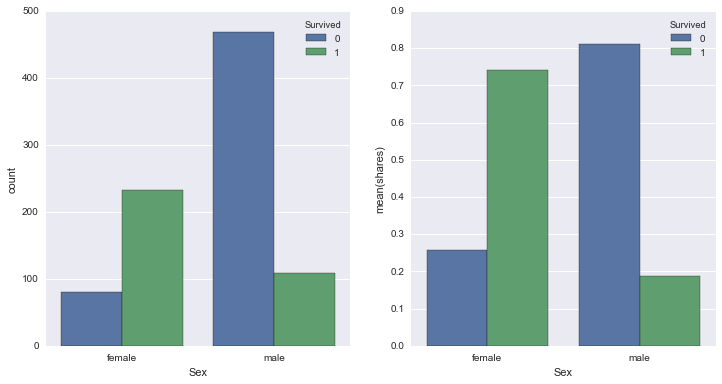

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

sns.countplot(x = 'Sex', hue = "Survived", data = titanic_df)

ax2 = fig.add_subplot(122)

titanic_sub_rel = group_percentages('Sex', 'Survived')
sns.barplot(x = 'Sex', y = 'shares', hue = 'Survived', data = titanic_sub_rel)

plt.show()

*Discussion:* The plot shows that more female passengers (74 percent) have survived the Titanic disaster then men (18 percent). I will further explore the relationship, below.


### Age

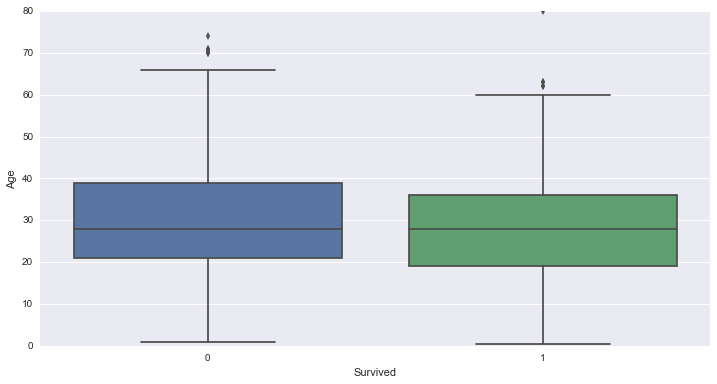

In [16]:
p1 = sns.boxplot(y = 'Age', x = "Survived", data = titanic_df)

*Discussion:* Here, the boxplot illustrates that the surviving passengers are only slightly younger than those that did not survive.


### Siblings

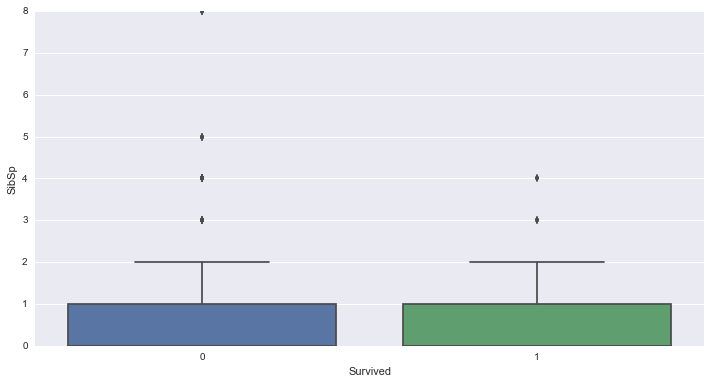

In [17]:
g = sns.boxplot(y = 'SibSp', x = "Survived", data = titanic_df)

*Discussion:* The plot shows that the number of siblings or spouses aboard does not differ largely among the group of survivors and non-survivors. The high number of outliers in the non-survived group, I would argue, is an artifact of passenger class, as passengers in the 3d class are more likely to be families than in the upper classes. This is underlined by the plot below, showing that families with many siblings or spouses are usually found in the 3d class.


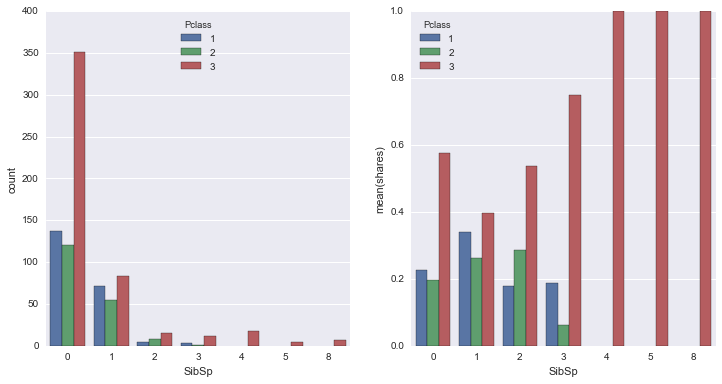

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

sns.countplot(x = 'SibSp', hue = "Pclass", data = titanic_df)


ax2 = fig.add_subplot(122)

titanic_sub_rel = group_percentages('SibSp', 'Pclass')
sns.barplot(x = 'SibSp', y = 'shares', hue = 'Pclass', data = titanic_sub_rel)

plt.show()

### Parents and Children

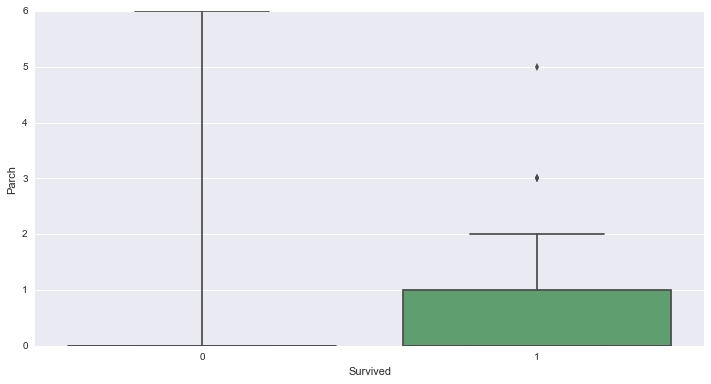

In [19]:
g = sns.boxplot(y = 'Parch', x = "Survived", data = titanic_df)

*Discussion:* We see that passengers with family members aboard survived more often. I will look at the effects of family ties in the analytical section, below.



### City of Embarkment

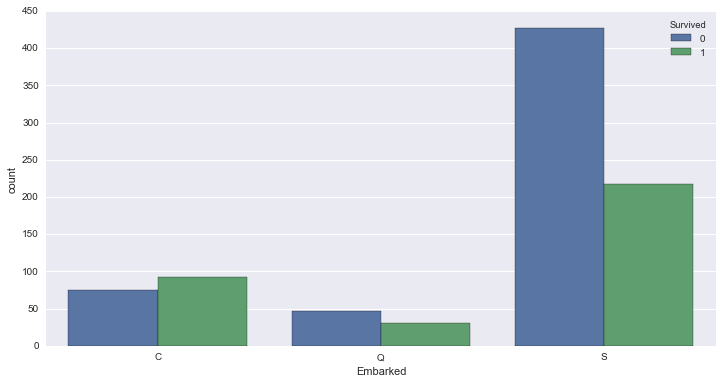

In [28]:
g = sns.countplot(x = 'Embarked', hue = "Survived", data = titanic_df)

*Discussion:* Next, looking at the place of boarding, we find that passengers boarding in Cherbourg survived relatively more often then those that embarked in Queenstown or Southampton. My guess is that the place of boarding is correlated with social class. This interpretation is supported by the plot below, illustrating that the majority of people boarding in Cherbourg held a first-class ticket.

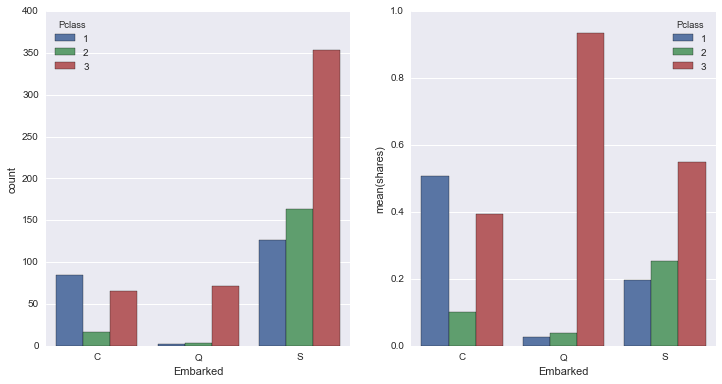

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

sns.countplot(x = 'Embarked', hue = 'Pclass', data = titanic_df)

ax2 = fig.add_subplot(122)

titanic_sub_rel = group_percentages('Embarked', 'Pclass')
sns.barplot(x = 'Embarked', y = 'shares', hue = 'Pclass', data = titanic_sub_rel)

plt.show()

## What could explain survival and death of Titanic passengers?

Next, I explore the following questions:

1.  Does Passenger Class, and thus social class, determine survival?
2.  How does gender influence survival?
2.  How do family ties affect a passenger's survival?

## Passenger Class and Survival

How does the passenger class influence the survival of passengers? First, let's check if the differences in the survival rates of passengers are significantly correlated with the passenger's class. To test the relationship, I consider `Survived` my dependent variable and `Pclass` my independent variable. The dependent variable is a dichotomous variable where `1` stands for the survival of the passenger. The independent variable is a nominal scaled variable, where `1` represents a first class passenger, `2` as second class passenger and `3` a third class passenger.

To test for statistical significance, I first use *Pearson's chi-squared test* to check if the grouping of passengers in their passenger classes causes significantly different distributions in their survival. The test assumes that the data is a random sample and that the individual samples are independent.

In [22]:
# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html
import scipy.stats 

# subset data in bring into count form for chi2 test
titanic_subset = titanic_df[['Survived', 'Pclass']]
counts_df = titanic_subset.groupby(['Pclass', 'Survived']).size().reset_index().pivot(index='Pclass', columns='Survived')

print('COUNTS IN THE DATA \n --------------------')
print(counts_df)
print('\n \n')
chi2, p_val, dof, expctd = scipy.stats.chi2_contingency(counts_df)
print('CHI-SQUARED RESULTS \n --------------------')
print('expected count \n --------------------')
print(pd.DataFrame(expctd))
print('\n')
print('Chi-squared: ', chi2)
print('Degrees of freedom: ', dof)
print('p-Value: ', p_val)



COUNTS IN THE DATA 
 --------------------
            0     
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

 

CHI-SQUARED RESULTS 
 --------------------
expected count 
 --------------------
            0           1
0  133.090909   82.909091
1  113.373737   70.626263
2  302.535354  188.464646


Chi-squared:  102.888988757
Degrees of freedom:  2
p-Value:  4.5492517113e-23


The results show that we should reject the 0 hypotheses that the data distribution is caused by a random process at the p < 0.001 level. Thus, there is a statistically significant correlation between passengers' class and their survival. Passengers in the higher classes had higher chances of survival.

## Gender and Survival

The plot above showed that women were the larges group of survivors. Let's check if the difference is statistically significant. Again, I use Pearson's chi-squared test with `Survival` as the dependent variable and `Sex` as the independent variable.

In [30]:
# subset data in bring into count form for chi2 test
titanic_subset = titanic_df[['Survived', 'Sex']]
counts_df = titanic_subset.groupby(['Sex', 'Survived']).size().reset_index().pivot(index='Sex', columns='Survived')

print('COUNTS IN THE DATA \n --------------------')
print(counts_df)
print('\n \n')
chi2, p_val, dof, expctd = scipy.stats.chi2_contingency(counts_df)
print('CHI-SQUARED RESULTS \n --------------------')
print('expected count \n --------------------')
print(pd.DataFrame(expctd))
print('\n')
print('Chi-squared: ', chi2)
print('Degrees of freedom: ', dof)
print('p-Value: ', p_val)

COUNTS IN THE DATA 
 --------------------
            0     
Survived    0    1
Sex               
female     81  233
male      468  109

 

CHI-SQUARED RESULTS 
 --------------------
expected count 
 --------------------
            0           1
0  193.474747  120.525253
1  355.525253  221.474747


Chi-squared:  260.717020167
Degrees of freedom:  1
p-Value:  1.19735706278e-58


The test results show that women indeed were significantly more often survivors of the Titanic disaster. I reject the null hypothesis of equal distribution at a significance level of p < 0.001.

## Family ties and survival

Can family ties help in explaining survival? The boxplot for the number of *parents or children on board* variable (`Parch`) showed that people with more direct family members on board were more likely to survive. Let's look at the data in more detail. 

To test significance, I run an *independent sample t-test*. It assumes that the population samples are independent and that the sample is drawn from a normal distribution. Again, `Survived` is my dependent variable and `Parch` is the independent one.


In [23]:
# look at the counts
titanic_subset = titanic_df[['Survived', 'Parch']]
counts_df = titanic_subset.groupby(['Parch', 'Survived']).size().reset_index().pivot(index='Parch', columns='Survived')
print(counts_df)

              0       
Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


In [24]:
# check variances
print('Mean of `Parch` for Survivors: ', titanic_subset[titanic_subset['Survived'] == 1].Parch.mean())
print('Variance of `Parch` for Survivors: ', titanic_subset[titanic_subset['Survived'] == 1].Parch.var())
print('Mean of `Parch` for Non-Survivors: ', titanic_subset[titanic_subset['Survived'] == 0].Parch.mean())
print('Variance of `Parch` for Non-Survivors: ', titanic_subset[titanic_subset['Survived'] == 0].Parch.var())
print()
print('Variance is not the same. Thus, the t-test needs to be adjusted')
print()
# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html
stat, p_val = scipy.stats.ttest_ind(titanic_subset[titanic_subset['Survived'] == 1].Parch, titanic_subset[titanic_subset['Survived'] == 0].Parch, equal_var=False)

print('T-TEST RESULTS \n ------------------')
print('test statistic: ', stat)
print('p-Value: ', p_val)

Mean of `Parch` for Survivors:  0.4649122807017544
Variance of `Parch` for Survivors:  0.5955394350980058
Mean of `Parch` for Non-Survivors:  0.3296903460837887
Variance of `Parch` for Non-Survivors:  0.6776022762022493

Variance is not the same. Thus, the t-test needs to be adjusted

T-TEST RESULTS 
 ------------------
test statistic:  2.47890842097
p-Value:  0.0133948371213


The test results show that we should reject the null hypothesis that the data are equally distributed at the p < 0.05 level. Thus, passengers with more parents or children aboard were significantly more likely to survive. In other words, survivors had on average 0.46 parents or children with them while non-survivors had only 0.33 on average.

Digging deeper, is it parents or their children that survive? As the `Parch` variable does not make a clear distinction, I will look at the age of people to create a group of children and a group of parents. I assume that people with `Age > 19 and Parch > 0` are parents and that people with `Age < 20 and Parch > 0` are parents. Of course, there may be cases where grown-up children travel with their parents, but I think that this group is relatively small and probably equally distributed among the group of survivors and non-survivors.

Again, I use a t-test to check for statistic significance.

In [25]:
# create parents and children group
children = titanic_df[(titanic_df['Age'] < 20) & (titanic_df['Parch'] > 0)]
parents = titanic_df[(titanic_df['Age'] > 19) & (titanic_df['Parch'] > 0)]

Who is more likely to survive, parents or children?

In [26]:
print('Mean survival  of children: ', pd.to_numeric(children['Survived']).mean())
print('Variance of survival of children: ', pd.to_numeric(children['Survived']).var())
print('Mean survival  of parents: ', pd.to_numeric(parents['Survived']).mean())
print('Variance of survival of parents: ', pd.to_numeric(parents['Survived']).var())
print()
print('Variance is about the same')
print()

# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html
stat, p_val = scipy.stats.ttest_ind(children.Survived, parents.Survived, equal_var=True)

print('T-TEST RESULTS \n ------------------')
print('test statistic: ', stat)
print('p-Value: ', p_val)

Mean survival  of children:  0.5543478260869565
Variance of survival of children:  0.24976110845676056
Mean survival  of parents:  0.5247524752475248
Variance of survival of parents:  0.25188118811881216

Variance is about the same

T-TEST RESULTS 
 ------------------
test statistic:  0.409990811474
p-Value:  0.682272170569


The test results show that parents and children are about as likely to survive. Thus, this speaks for family ties that help passengers to survive. To test further, let's check if the group of parents and children together had significantly better chances of survival.

In [27]:
# create groups
pars_childr = titanic_df[((titanic_df['Age'] < 20) & (titanic_df['Parch'] > 0)) | ((titanic_df['Age'] > 19) & (titanic_df['Parch'] > 0))]
others = titanic_df[titanic_df['Parch'] == 0]

# calculate survival chances
print('Mean survival of families: ', pd.to_numeric(pars_childr['Survived']).mean())
print('variance of survival of families: ', pd.to_numeric(pars_childr['Survived']).var())
print('Mean survival of non-families: ', pd.to_numeric(others['Survived']).mean())
print('Variance of survival of non-families: ', pd.to_numeric(others['Survived']).var())
print()
print('Variance is about the same')
print()

# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html
stat, p_val = scipy.stats.ttest_ind(pars_childr.Survived, others.Survived, equal_var=True)

print('T-TEST RESULTS \n ------------------')
print('test statistic: ', stat)
print('p-Value: ', p_val)


Mean survival of families:  0.538860103626943
variance of survival of families:  0.24978411053540606
Mean survival of non-families:  0.34365781710914456
Variance of survival of non-families:  0.22589029337307073

Variance is about the same

T-TEST RESULTS 
 ------------------
test statistic:  4.97627161153
p-Value:  7.81469385694e-07


The t-test results show that we should reject the null hypothesis of equal distribution of survival of families and non-families at the p < 0.001 level. Thus, family members were significantly better off at the sinking of the Titanic. On average, 53.9 percent of passengers with family ties survived while only 34.4 percent of those without family aboard did.

# Conclusions

In this first look at the data, I explored some relationships of the independent variables with the dependent variable (Titanic survival). As shown above, it is a passenger's class, gender and family status that are strongly correlated with survival. In addition, as I showed, these relationships are statistically significant. It is thus likely that there is indeed a causal relationship between passenger class and family ties and survival. For example, families may have taken greater care for each other or have been given priority when boarding lifeboats. The same may apply to female passengers. Similarly, first class passengers may have had better access to lifeboats than third class passengers that were located on lower levels of the ship and thus needed more time to reach lifeboats. To draw stronger conclusions, a multivariate analysis should follow, controlling for the effects of all variables at the same time.